### 이미지 분류

#### CNN
- Convolutional Neural Network - 합성곱 신경망 : 이미지/영상으로부터 필터 개수와 같은 하이퍼파라미터를 조정하면서 특징을 추출하는 자동화 신경망 방법 중 하나

<!-- 이미지 복사/붙여넣기는 깃허브에서 오류! -->
<!-- 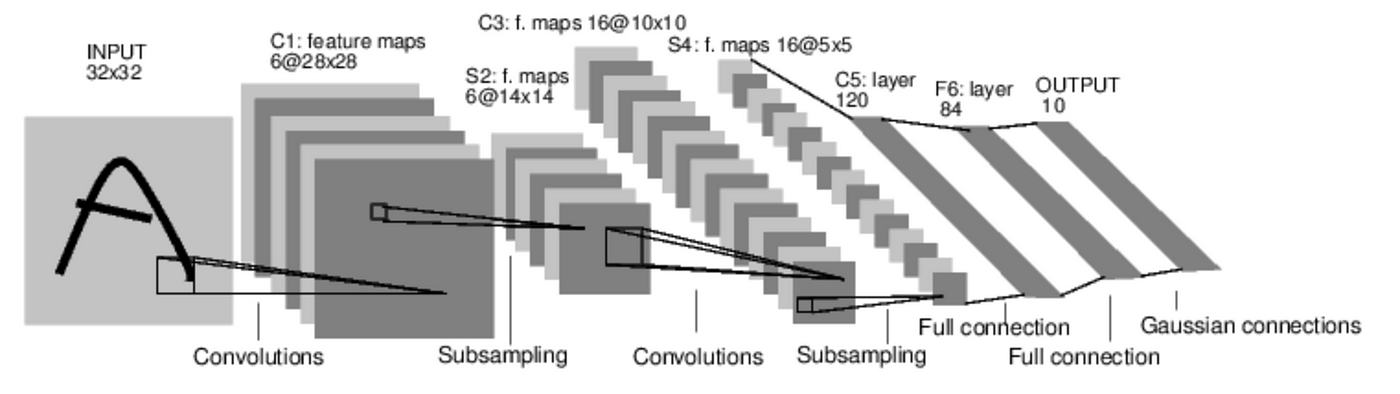 -->
<img src="./cnn_concept.png" width="700">

- 참조 : https://mijeongban.medium.com/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-cnn-convolutional-neural-networks-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-836869f88375

In [51]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader

In [52]:
warnings.simplefilter('ignore') # 경고메시지 출력 숨김

In [13]:
## CPU/GPU 확인
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

torch.__version__, device

('2.4.0+cu121', device(type='cuda'))

In [14]:
## CNN에서 제일 유명한 MNIST(미국 국립 기술표준연구소)에서 제공하는 이미지 데이터베이스
train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_ds = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [31]:
## 랜덤을 할 때마다 다른 결과가 나오기 때문에 랜덤값을 고정할 필요가 있음
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed(777)

In [32]:
## 하이퍼파라미터 지정
learning_rate = 0.001
training_epoch = 10
batch_size = 100

In [33]:
## 파이토치 훈련, 테스트할 때 쉽게 쓸 수 있도록 데이터로더로 변환
train_ldr = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_ldr = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=False)    ## Test(실험) 데이터는 섞을 필요없음

In [34]:
len(train_ldr),len(test_ldr)

(600, 100)

In [35]:
## 데이터 확인, X는 독립변수, y는 종속변수(답)
for(X_train, y_train) in train_ldr:
    print(f'X_train : {X_train.size()}, type: {X_train.type()} / y_train : {y_train.size()}, type: {y_train.type()}')

X_train : torch.Size([100, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([100]), type: torch.LongTensor
X_train : torch.Size([100, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([100]), type: torch.LongTensor
X_train : torch.Size([100, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([100]), type: torch.LongTensor
X_train : torch.Size([100, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([100]), type: torch.LongTensor
X_train : torch.Size([100, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([100]), type: torch.LongTensor
X_train : torch.Size([100, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([100]), type: torch.LongTensor
X_train : torch.Size([100, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([100]), type: torch.LongTensor
X_train : torch.Size([100, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([100]), type: torch.LongTensor
X_train : torch.Size([100, 1, 28, 28]), type: torch.Floa

In [38]:
## 배치사이즈 32 * 1875 = 60000장 사진으로 구성
len(train_ldr),len(train_ds)

(600, 60000)

In [39]:
X_train[0], X_train[0, :, :, : ]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

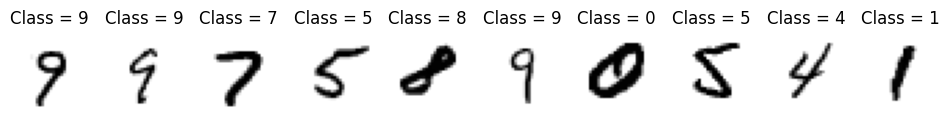

In [40]:
## 데이터셋 이미지 확인
plt.figure(figsize=(12, 1))

for i in range(0, 10):
    plt.subplot(1, 10, i + 1)   # 서브플롯을 10개 생성
    plt.axis('off')     # x, y 좌표 히든
    plt.imshow(X_train[i].numpy().reshape(28, 28), cmap='gray_r')
    plt.title(f'Class = {y_train[i].item()}')

In [42]:
## 모델 생성
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 첫 번째 히든레이어
        self.layer1 = nn.Sequential(
            ### CNN 히든 레이어
            ### nn.Conv2d(입력채널수, 출력채널수, 필터크기, stride=필터를 적용하는 간격, padding=실제이미지 테두리에 빈 픽셀 추가(여백의 크기))
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(), ## 활성화함수는 ReLu 기본
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # 두 번째 히든레이어
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # fully connected layer 생성
        # 히든레이어를 하나 돌면 28/2 = 14 X 14 이미지, 두 번째 히든레이어를 돌면 14/2 -> 7X7 이미지
        # 분류되는 결과값 0 ~ 9 기 때문에 마지막 레이어출력 개수 10개
        self.fc = nn.Linear(7 * 7 * 64, 10, bias=True)
        nn.init.xavier_uniform(self.fc.weight)  # 가중치 정규분포 초기화(사비에르)

    ## 데이터셋이 레이어들을 통과할 수 있게!
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)     # fc layer 보내기전에 배치사이즈 기준의 row 만들기
        out = self.fc(out)
        return out

In [43]:
## CNN 모델 생성
model = CNN().to(device)

C:\Users\user\AppData\Local\Temp\ipykernel_22508\456125032.py:23: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  nn.init.xavier_uniform(self.fc.weight)  # 가중치 정규분포 초기화(사비에르)


In [44]:
model.eval()

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [45]:
## 손실함수, 최적화 알고리즘 설정
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
total_batch = len(train_ldr)    # 600
print('훈련시작!')

for epoch in range(training_epoch):
    avg_cost = 0

    for X, y in train_ldr:
        # X 이미지 28 * 28
        X = X.to(device)    # GPU 사용
        y = y.to(device)

        optimizer.zero_grad()           # 이전 그레디언트(경사하강) 삭제
        hypothesis = model(X)           # 값 예측
        cost = criterion(hypothesis, y) # 손실(비용)함수 계산
        cost.backward()                 # 현재 그레디언트 계산
        optimizer.step()                # 가중치 업데이트

        avg_cost += cost / total_batch
    
    print(f'Epoch : {epoch+1:>4} cost = {avg_cost:>.9}')
print("훈련끝!")

훈련시작!
Epoch :    1 cost = 0.0624385513
Epoch :    2 cost = 0.0469918177
Epoch :    3 cost = 0.0381241962
Epoch :    4 cost = 0.0312280245
Epoch :    5 cost = 0.0267643128
Epoch :    6 cost = 0.0228336174
Epoch :    7 cost = 0.0193866324
Epoch :    8 cost = 0.0165363625
Epoch :    9 cost = 0.0144127365
Epoch :   10 cost = 0.0117499642
훈련끝!


##### CPU/GPU 사용 시 훈련시간
- CPU : 21분 29초
- GPU : 1분 4초
- GPU 썼을 때 CPU로 처리 시간의 20배정도 효율

In [48]:
len(test_ds)

10000

In [53]:
## 테스트 데이터로 실험
with torch.no_grad():
    X_test = test_ds.test_data.view(len(test_ds), 1, 28, 28).float().to(device=device)
    y_test = test_ds.test_labels.to(device=device)

    prediction = model(X_test)
    corrects = torch.argmax(prediction, 1) == y_test
    accuracy = corrects.float().mean()

    print(f'모델 정확도 = {accuracy.item()}')

모델 정확도 = 0.9896999597549438


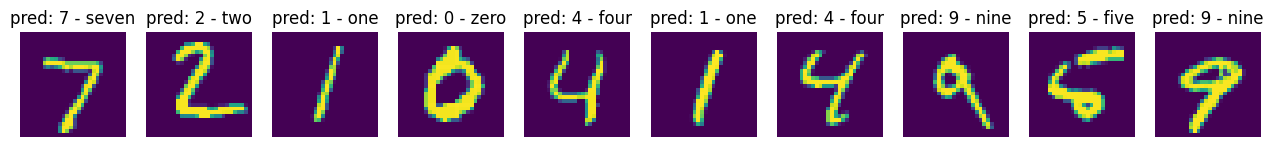

In [56]:
## 이미지 예측결과 확인
classes = train_ds.classes

def convert_format(image):
    image = image / 2 + 0.5
    image = image.numpy().clip(0,1)

    return image.transpose(1,2,0)

def visualize_model(model, num_images=10):
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(16,16))

    with torch.no_grad():
        for i, (images, labels) in enumerate(test_ldr):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for j in range(images.size()[0]):
                images_so_far += 1
                ax = plt.subplot(1, num_images, images_so_far)
                ax.axis('off')
                ax.set_title('pred: {}'.format(classes[preds[j]]))
                ax.imshow( convert_format(images.cpu().data[j]) )

                if images_so_far == num_images:
                    return
                

visualize_model(model)

##### 결론
- GPU를 쓰자.
- Fashion-MNIST도 동일하게 사용할 수 있음